# Data Science Research on the Titanic Data Set

## Research Questions: 

1. How did gender affect the outcome of survival?

2. Which age classes tended more to survival?

3. Which of the given values correlates most to the survival of the passenger?

4. Does Linear Regression or Logistic Regression perform more accurate on predicting survivability? 




In [51]:
#Data Modules
import pandas as pd
import numpy as np

#ML Modules
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

#Plot Modules
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#Loading the dataset
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
#Checking for irregular datatypes
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [54]:
#Dropping unwanted columns
train_data = train_data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)

# 1. How did gender affect survival?

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64 

Women Survived: 74.2%
Men Survived: 18.89%


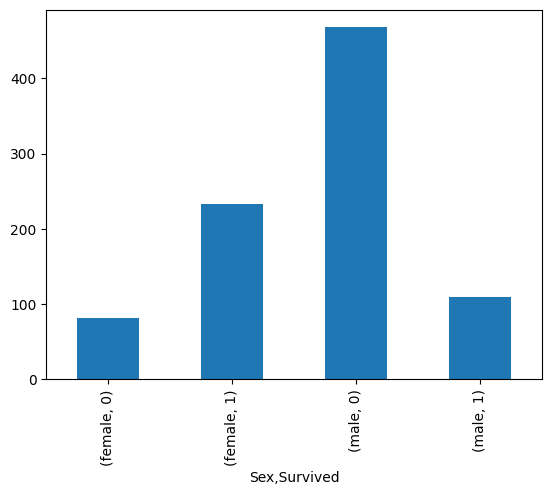

In [55]:
#Grouping the columns "sex" and "survived" to display the survived women and men.
sex_survived = train_data.groupby(['Sex','Survived'])['Survived'].count()
sex_survived.plot(kind="bar")
print(sex_survived, "\n")

#Calculating the rounded percentage of men and women survived
w = (233/(81+233))*100
m = (109/(468+109)*100)
print(f"Women Survived: {round(w,2)}%")
print(f"Men Survived: {round(m,2)}%")

Plotting out the male and female survived (1) and died (0) persons we can clearly see that more women have survived than men (more than x2).

When going for a more detailed calculation, we can see that from the 314 women on board 233 **(74.2%)** survived. From the 577 men only 109 **(18.89%)** survived

## 2. How did age affect survival

When looking at the age of survived people, the results are kind of stretched all over the spectrum with a slight increase in survivability in the range from 18 to 36 years

In [56]:
#Plotly figure to display survival over age
fg = px.bar(train_data, x="Age", y="Survived",hover_name="Age")
fg.show()

In [57]:
#Plot to display death and survival over age
fg = px.bar(train_data, x="Age", y="Age",hover_name="Survived", color="Survived")
fg.show()

### Looking at this plot we can see that the increased survivability in the 18 to 36 years range isn't really an increase to to this range also being the one with the most people in it.

In [58]:
#Check for the remaining columns
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## One Hot Encoding and NaN filling

In [59]:
#Converting "sex" and "embarked" to numericals
train_data = pd.get_dummies(train_data, columns=["Sex", "Embarked"])

In [60]:
#Check for the updated values
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [61]:
#Filling NaN Age values with the median value from all of the "Age" column and converting them to from floats to integers
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
train_data['Age'] = train_data['Age'].astype(int)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1


## Label Encoding

Cutting down Age and Fare to a range of 6 and 4 integers 

In [62]:
label = LabelEncoder()

#Cutting the input values as intervalls
train_data['Age'] = pd.cut(train_data['Age'].astype(int), 6)
train_data['Fare'] = pd.cut(train_data['Fare'].astype(int), 4)

#Encoding Labels with fit_transform
train_data['Age'] = label.fit_transform(train_data['Age'])
train_data['Fare'] = label.fit_transform(train_data['Fare'])


## 3. Which of the given values correlates most to the survival of the passenger?



Looking at the following correlation heatmap we can clearly see that "sex_female" correlates the most to "survived". This adds to the prevously discovered fact that alot more women survived in this dataset. On the other hand "sex_male" has a negative correlation.

<Axes: >

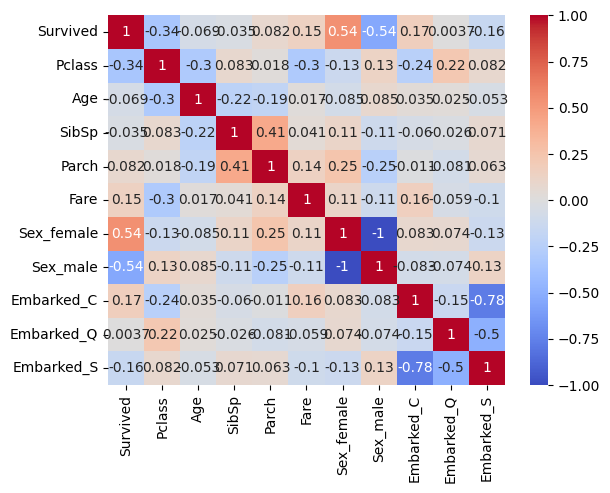

In [63]:
train_corr = train_data.corr()

sns.heatmap(train_corr,annot=True, cmap="coolwarm")

## 4. Does Linear Regression or Logistic Regression perform more accurate on predicting survivability? 

In [64]:
#Setting up our x and y values
x = train_data[["Sex_female", "Sex_male", "Age", "Pclass", "Fare"]]
y = train_data["Survived"]


In [65]:
#Train test split function to split up out training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10, shuffle=True)

In [67]:
#Initializing the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [68]:
#Initializing the Logistic Regression model
model_log = LogisticRegression()
model_log.fit(x_train, y_train)

LogisticRegression()

In [69]:
#Getting Preictions for Linear Regression
y_pred = model.predict(x_test)
y_pred

array([ 0.08398438,  0.1328125 ,  0.1328125 ,  0.83007812,  0.92578125,
        0.1328125 ,  0.1328125 ,  0.20898438,  0.08398438,  0.1328125 ,
        0.30859375,  0.84960938,  0.79882812,  0.43164062,  0.25976562,
        0.25976562,  0.08398438,  0.18164062,  0.625     ,  0.08398438,
        0.08398438,  0.25976562,  0.75195312,  0.1328125 ,  0.18164062,
        0.1328125 ,  0.1328125 ,  0.53125   ,  0.20898438,  0.92578125,
        0.92578125,  0.25976562,  0.67382812,  0.08398438,  0.625     ,
        0.08398438,  0.625     ,  0.49023438,  0.08398438,  0.08398438,
        0.08398438,  0.25976562,  0.08398438,  0.625     ,  0.3828125 ,
        0.43164062,  0.1328125 ,  0.1328125 ,  0.97460938,  0.3828125 ,
        0.43164062,  0.20898438,  0.08398438,  0.3828125 ,  0.35742188,
        0.97460938,  0.18164062,  0.57617188,  0.87890625,  0.1328125 ,
        0.1328125 ,  0.875     ,  0.57617188,  0.625     , -0.06445312,
        0.1328125 ,  0.25976562,  0.08398438,  0.08398438,  0.75

In [70]:
#Getting Preictions for Logistic Regression
y_pred_log = model_log.predict(x_test)
y_pred_log

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [71]:
#Getting accuracy values for both Models

from sklearn.metrics import mean_absolute_error, r2_score

#Mean absolute error and R-Squared Score for Linear Regression
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Linear - Mean Absolute Error:', mae)
print('Linear - R-squared Score:', r2)
print("")
#Accuracy and F1-Score for Logistic Regression
accuracy = accuracy_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log, average='weighted')
print('Logistic - Accuracy:', accuracy)
print('Logistic - F1-score:', f1)

Linear - Mean Absolute Error: 0.26584322625698326
Linear - R-squared Score: 0.46793209503989985

Logistic - Accuracy: 0.8324022346368715
Logistic - F1-score: 0.831738642484489


## Results

Comparing the accuracy score of both algorithms we can clearly see that the classification from our Logistic Regresseion performs way better than the linear calculation. Taking in mind the nature of classification this makes sense since we're looking for a value which can only consist of 0 or 1, thus can be classified as true or false. 

# Conclusion

Regarding the question on how gender affected the out come and survival it was clear that the "sex_female" attribute contributed a lot to the success of survival. When asking why this was a key factor a further cultural/historical reasearch on social practises in the time of the titanic would probably be neccesary to prove any point here.

Not so clear was the role of the "Age" attribute as on first sight there seemed to be an increase in survivability in a certain young age range. In the whole picture this made sense due to this exact age range being the span where the most people where in. This realization denied the fact that his age range was a factor for survivability but showed us a good picture of the amount of people in a certain age class. 

For correlations i can surely say that "sex_female" correlates the most with "survival" and "sex_male" has a mirrored negative correlation to the "survival" attribute. 

When trying to predict the chance of survival using a machine learning algorithm, Logistic Regression turned out to be the superior choice scoring with a ~83% Accuracy compared to the R-Squared score of ~47% from our Linear Regression Model.





# Refferences

Dataset from Kaggle: https://www.kaggle.com/competitions/titanic/data


# Bonus

Here i'm testing out the two regression models

In [72]:
test_log = [
   1, #Sex_female
   0, #Sex_male
   3, # Age
   3, # Pclass
   20 # Fare
]

test_log = model_log.predict([test_log])
test_log

C:\Users\luwa0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([1], dtype=int64)

In [73]:
test = [
   1, #Sex_female
   0, #Sex_male
   2, # Age
   1, # Pclass
   20, #Fare
]

# Make prediction
test = model.predict([test])
test

C:\Users\luwa0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([1.00585938])